In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
ok_cupid_df = pd.read_csv('data/okcupid_profiles_clean.csv')
ok_cupid_df.columns

Index(['age', 'height', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7',
       ...
       'tibetan', 'turkish', 'ukrainian', 'urdu', 'vietnamese', 'welsh',
       'yiddish', 'last_online_year', 'last_online_month',
       'last_online_weekday'],
      dtype='object', length=415)

In [3]:
ok_cupid_df.shape

(59943, 415)

In [4]:
ok_cupid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59943 entries, 0 to 59942
Columns: 415 entries, age to last_online_weekday
dtypes: float64(1), int64(414)
memory usage: 189.8 MB


In [5]:
ok_cupid_df.head(2)

,age,height,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,...,tibetan,turkish,ukrainian,urdu,vietnamese,welsh,yiddish,last_online_year,last_online_month,last_online_weekday
0,22,75.0,1251,253,114,124,381,33,27,78,...,0,0,0,0,0,0,0,2012,6,1
1,35,70.0,661,52,96,0,249,276,0,0,...,0,0,0,0,0,0,0,2012,6,1


In [6]:
ok_cupid_df_log = np.log(ok_cupid_df+1)

In [7]:
#ok_cupid_df_log_sample = ok_cupid_df_log.sample(frac=0.1)
ok_cupid_df_log_sample = ok_cupid_df_log

In [8]:
from sklearn.decomposition import PCA

# set up our PCA object, we'll take a look at the first 4 principal components
pca = PCA()
pca_log = PCA()
pca_log_sample = PCA()

pca.fit(ok_cupid_df)
pca_log.fit(ok_cupid_df_log)
pca_log_sample.fit(ok_cupid_df_log_sample)

pc_df = pca.transform(ok_cupid_df)
pc_df_log = pca.transform(ok_cupid_df_log)
pc_df_log_sample = pca.transform(ok_cupid_df_log_sample)

In [9]:
cumulative_sum = np.cumsum(pca_log_sample.explained_variance_ratio_)
expl_var = pca_log_sample.explained_variance_ratio_

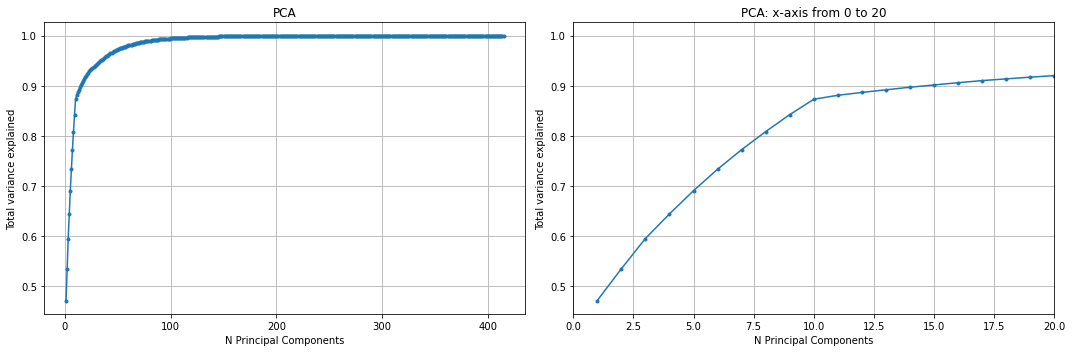

In [10]:
# examine plot for a potential elbow
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,cumulative_sum.shape[0]+1), cumulative_sum, marker='.')
plt.xlabel('N Principal Components')
plt.ylabel('Total variance explained')
#plt.xticks(range(0,2744,200))
plt.title('PCA')
plt.grid()
plt.savefig('images/pca_n_components.png', dpi=200)

plt.subplot(1,2,2)
plt.plot(range(1,cumulative_sum.shape[0]+1), cumulative_sum, marker='.')
plt.xlabel('N Principal Components')
plt.ylabel('Total variance explained')
plt.title('PCA: x-axis from 0 to 20')
plt.xlim(0,20)
plt.grid()
plt.tight_layout()
plt.savefig('images/pca_n_components_zoom.png', dpi=200)
plt.show()

In [11]:
pca_log = PCA(n_components=10)
pc_df_log = pca_log.fit_transform(ok_cupid_df_log)

In [12]:
#sns.pairplot(pd.DataFrame(pc_data))

<Figure size 432x288 with 0 Axes>

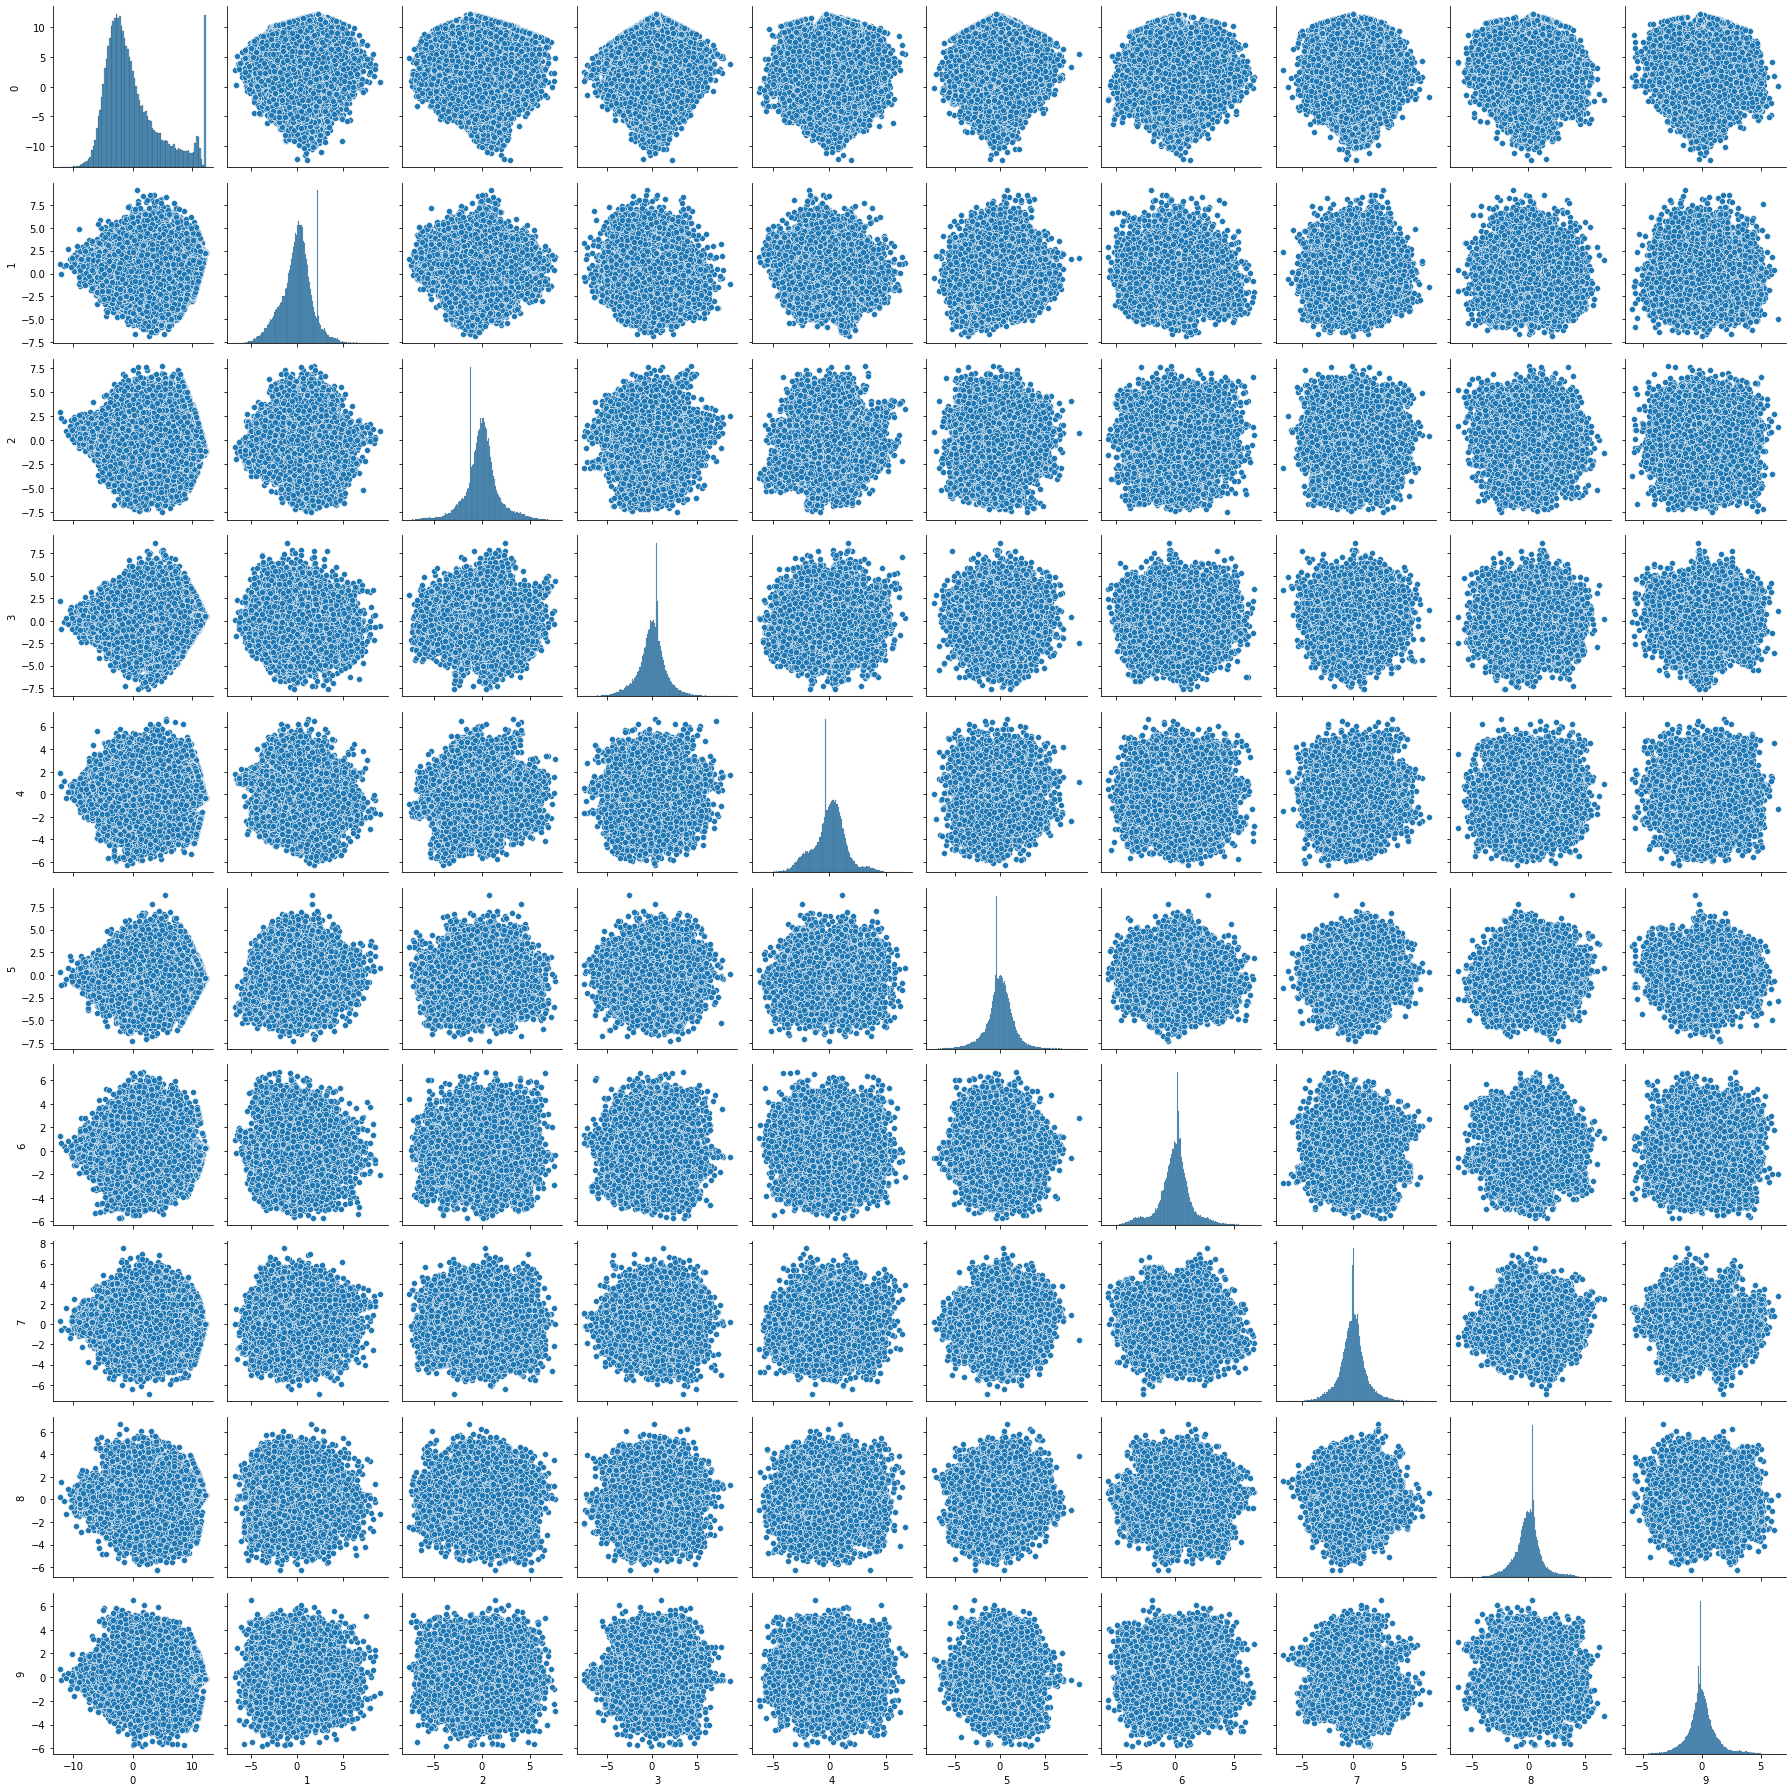

In [13]:
plt.figure()
sns.pairplot(pd.DataFrame(pc_df_log))
plt.tight_layout()
plt.savefig('images/pairplot_log.png', dpi=200)
plt.show()

Seems like there might be at least 2 clusters

In [14]:
ok_cupid_df_log_sample = ok_cupid_df_log.sample(frac=0.1)
pca_log_sample = PCA(n_components=10)
pc_df_log_sample = pca_log.fit_transform(ok_cupid_df_log_sample)

from sklearn.manifold import TSNE

# t-SNE is pretty slow, so let's sample our data
# sample = df2.sample(frac=0.2)

tsne = TSNE(n_components=4, method='exact')
tsne_data = tsne.fit_transform(pc_df_log_sample)

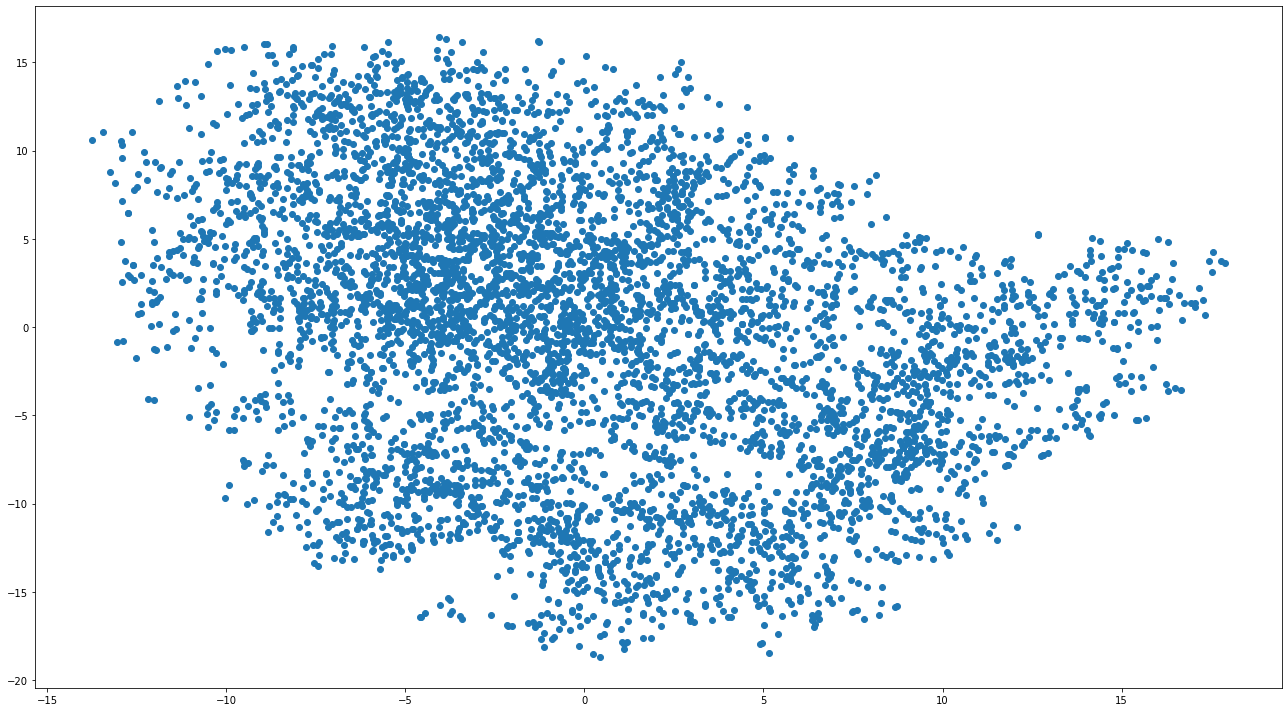

In [15]:
plt.figure(figsize=(18,10))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.tight_layout()
plt.savefig('images/tsne_log.png', dpi=200)
plt.show()

This shows some very clear separation into perhaps more than 6 groups.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(ok_cupid_df)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(ok_cupid_df)

display(X.shape)

(59943, 415)

In [18]:
X_log = scaler.fit_transform(ok_cupid_df_log)

In [19]:
X_log_sample = scaler.fit_transform(ok_cupid_df_log_sample)

In [20]:
from sklearn.cluster import KMeans

In [21]:
k_values_log = range(1, 30)
inertia_list_log = []

for k in k_values_log:
    
    # Create & fit our kmeans model
    kmeans_log = KMeans(n_clusters=k)
    kmeans_log.fit(X_log)
    
    # Get inertia score and add to our list
    inertia_list_log.append(kmeans_log.inertia_)

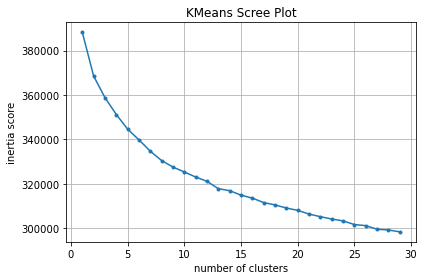

In [22]:
# Visualize the scree plot
plt.figure()
plt.plot(k_values_log, inertia_list_log, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.title('KMeans Scree Plot')
plt.grid()
plt.tight_layout()
plt.savefig('images/k_means_scree_plot_log.png', dpi=200)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    
    # Create & fit our kmeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_log)
    
    # Get cluster labels and calculate the silhouette score
    cluster_labels = kmeans.labels_
    silhouette = silhouette_score(X_log, cluster_labels)
    silhouette_scores.append(silhouette)

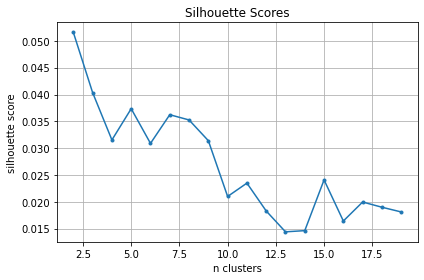

In [24]:
plt.figure()
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('n clusters')
plt.ylabel('silhouette score')
plt.title('Silhouette Scores')
plt.grid()
plt.tight_layout()
plt.savefig('images/silhouette_score_plot_log.png', dpi=200)
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering

k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    
    # Create & fit our agglomerative model
    aggclust = AgglomerativeClustering(n_clusters=k)
    aggclust.fit(X_log_sample)
    
    # Get cluster labels and calculate the silhouette score
    cluster_labels = aggclust.labels_
    silhouette = silhouette_score(X_log_sample, cluster_labels)
    silhouette_scores.append(silhouette)

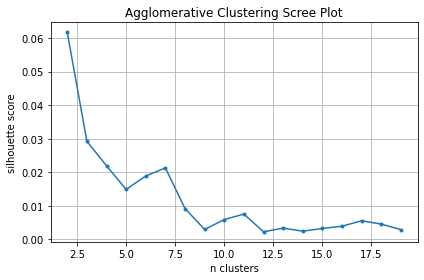

In [26]:
plt.figure()
plt.plot(k_values, silhouette_scores, marker='.')
plt.xlabel('n clusters')
plt.ylabel('silhouette score')
plt.title('Agglomerative Clustering Scree Plot')
plt.grid()
plt.tight_layout()
plt.savefig('images/agglomerative_scree_plot.png', dpi=200)
plt.show()